In [1]:
import seaborn as sns
%matplotlib inline

In [23]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


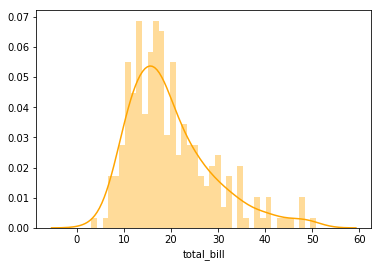

In [22]:
sns.distplot(tips['total_bill'],kde=True,color='orange', bins=40)

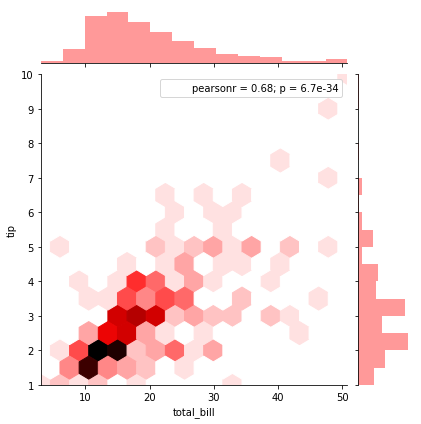

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips, color='r',kind='hex')

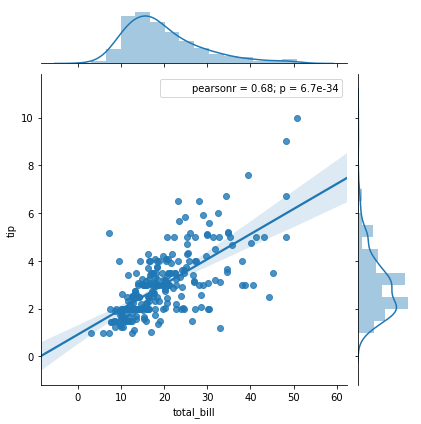

In [30]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') #regression model

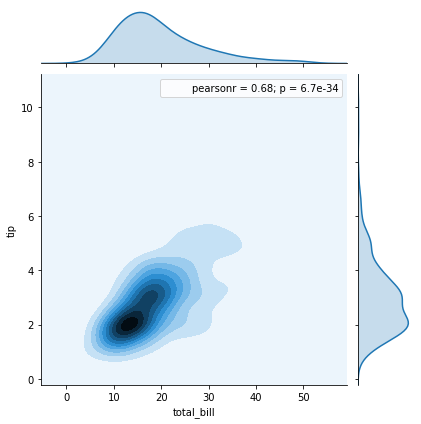

In [31]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') #density plot

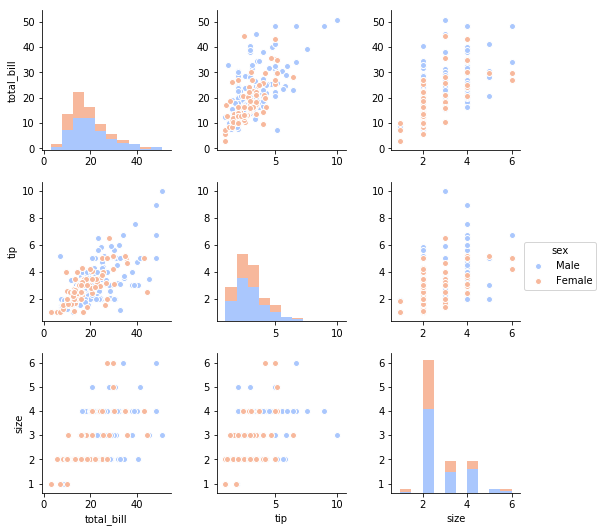

In [35]:
sns.pairplot(tips, hue = 'sex', palette='coolwarm') 
#all the possible combinations of numbers are shown
#hue - non numerical value can be done to differentiate
#palette - selects a color scheme based on type of paletter we want

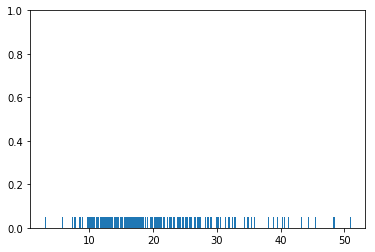

In [37]:
sns.rugplot(tips['total_bill'])
#dash on every instance

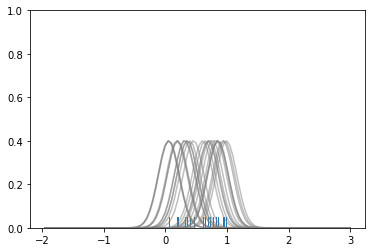

In [49]:
#KDE -Kernel Density Estimation
#gaussian normal distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.rand(25)

sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)

    plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis Functions')

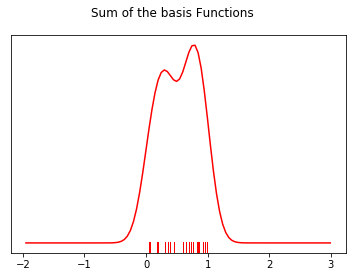

In [50]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color= 'r')

sns.rugplot(dataset, c = 'r')

plt.yticks([])

plt.suptitle("Sum of the basis Functions")

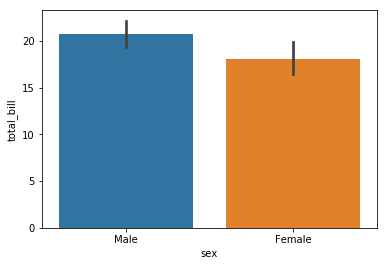

In [57]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.mean)
#barplot for x and y
#estimator = calculates the various counts

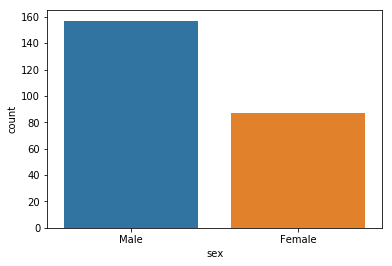

In [58]:
sns.countplot(x='sex', data=tips)

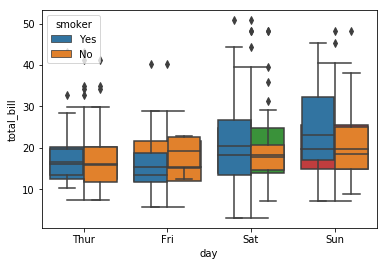

In [69]:
sns.boxplot(x='day',y='total_bill', data=tips)
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker')

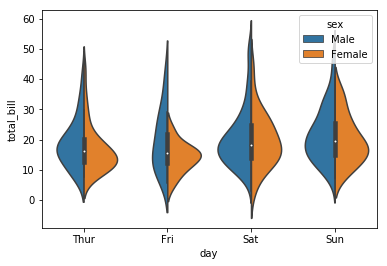

In [65]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex',split=True)

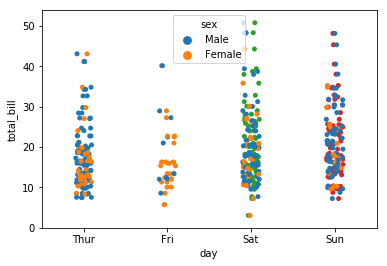

In [74]:
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True)
sns.stripplot(x='day',y='total_bill', data=tips, jitter=True, hue='sex')

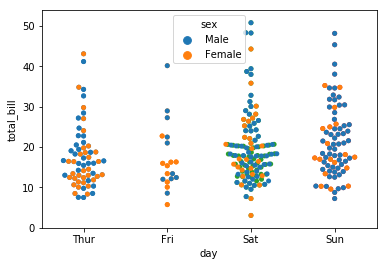

In [76]:
sns.swarmplot(x='day', y='total_bill',data=tips)
sns.swarmplot(x='day', y='total_bill',data=tips, hue='sex')

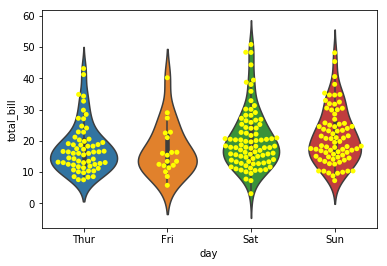

In [78]:
sns.violinplot(x='day', y='total_bill',data=tips)
sns.swarmplot(x='day', y='total_bill',data=tips, color='yellow')

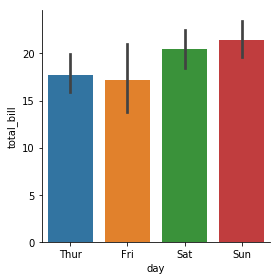

In [84]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='bar')

In [85]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [88]:
tc = tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


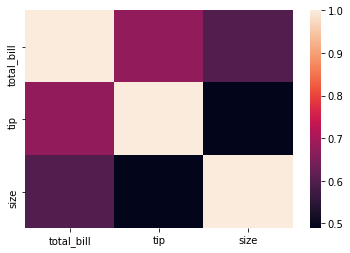

In [89]:
sns.heatmap(tc)

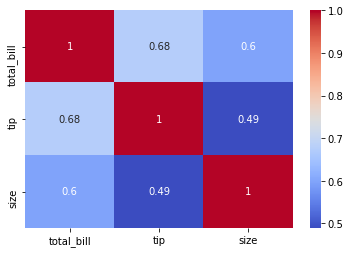

In [92]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [94]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


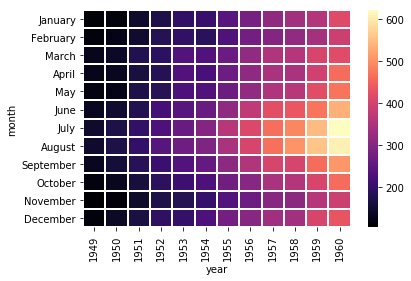

In [101]:
sns.heatmap(fp, cmap='magma', linewidth=1, linecolor='white')

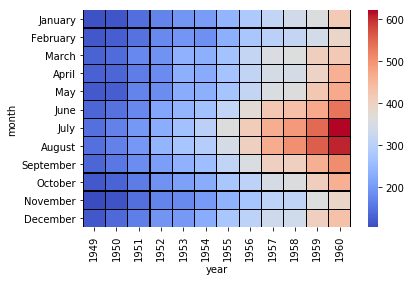

In [106]:
sns.heatmap(fp, cmap='coolwarm', linewidth=0.2, linecolor='black')

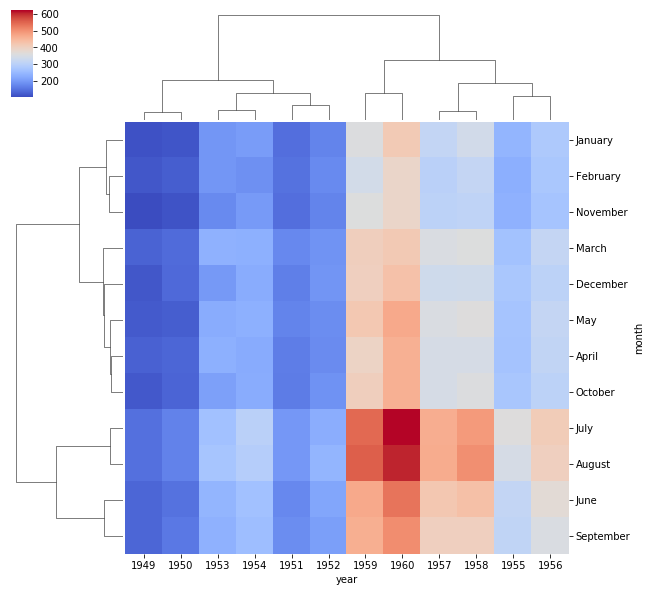

In [108]:
sns.clustermap(fp, cmap='coolwarm')

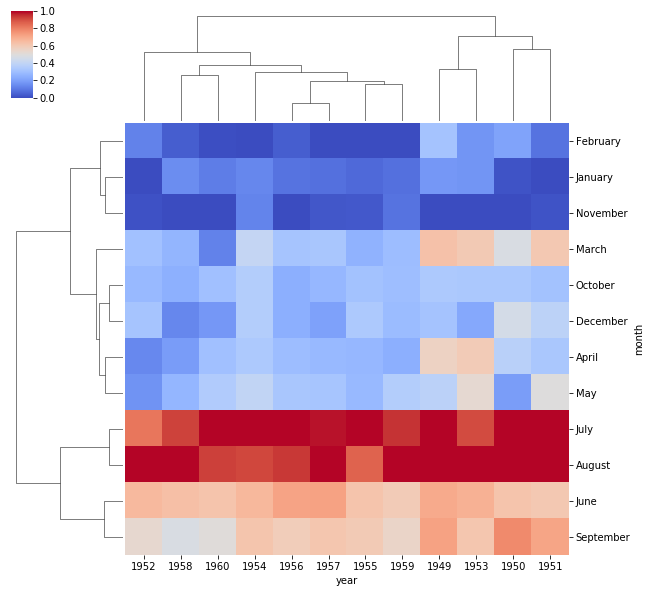

In [109]:
sns.clustermap(fp, cmap='coolwarm',standard_scale=1)

In [110]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/viveksasikumar/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


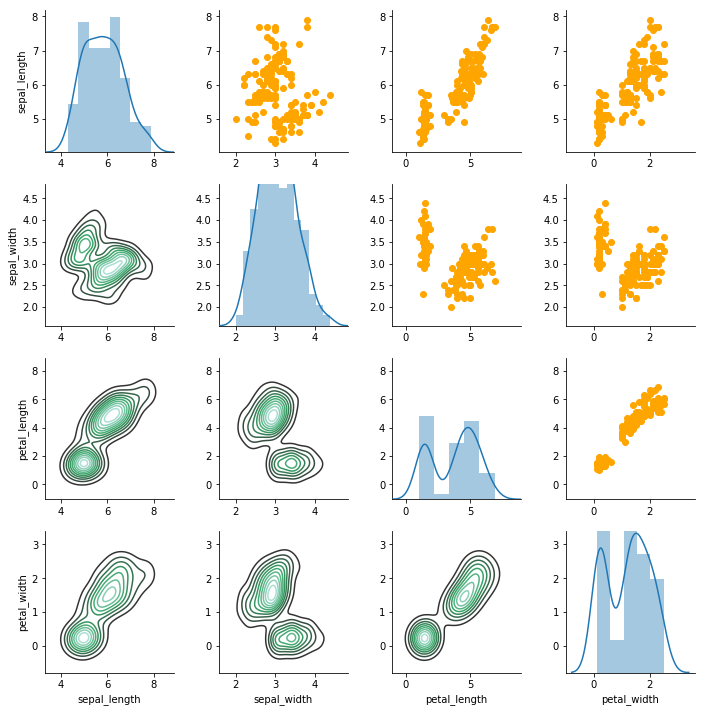

In [119]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter,color='orange')
g.map_lower(sns.kdeplot,color='gradient')

In [120]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


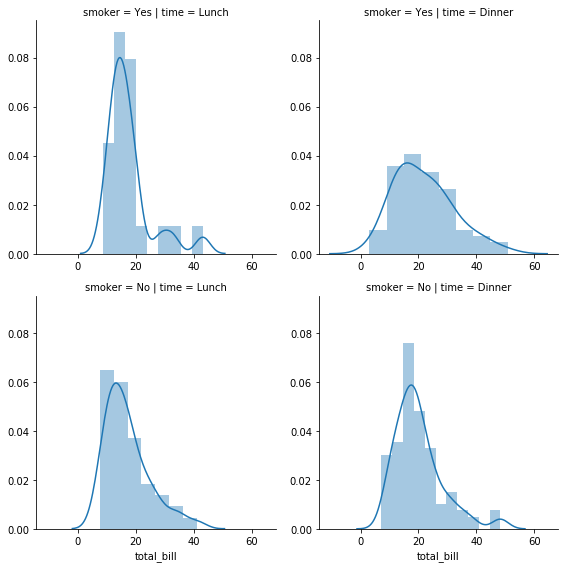

In [127]:
h = sns.FacetGrid(data=tips,col='time',row='smoker',palette='coolwarm',size=4)
h.map(sns.distplot,'total_bill') #only one argument required

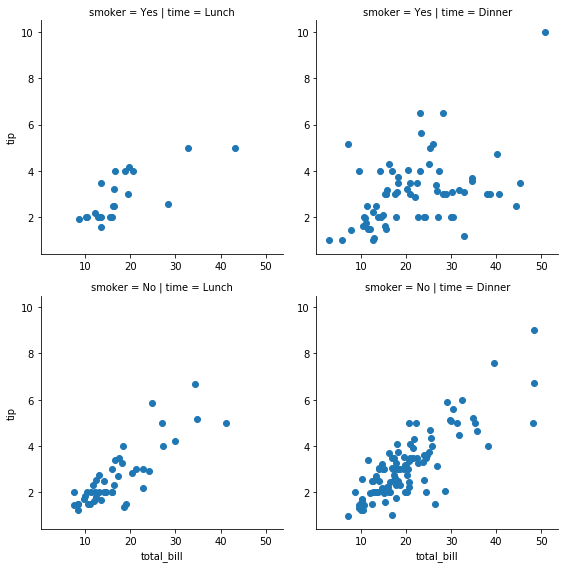

In [132]:
h = sns.FacetGrid(data=tips,col='time',row='smoker',palette='coolwarm',size=4)
h.map(plt.scatter,'total_bill','tip') #only one argument required

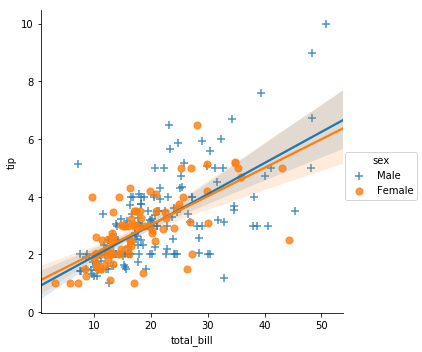

In [141]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex',markers=['+','o'],
          scatter_kws={'s':50})

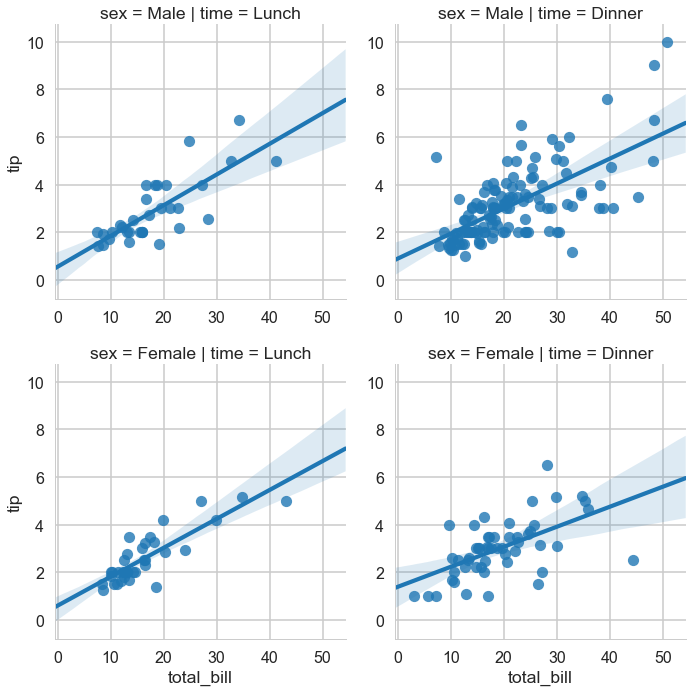

In [176]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='time',row='sex')

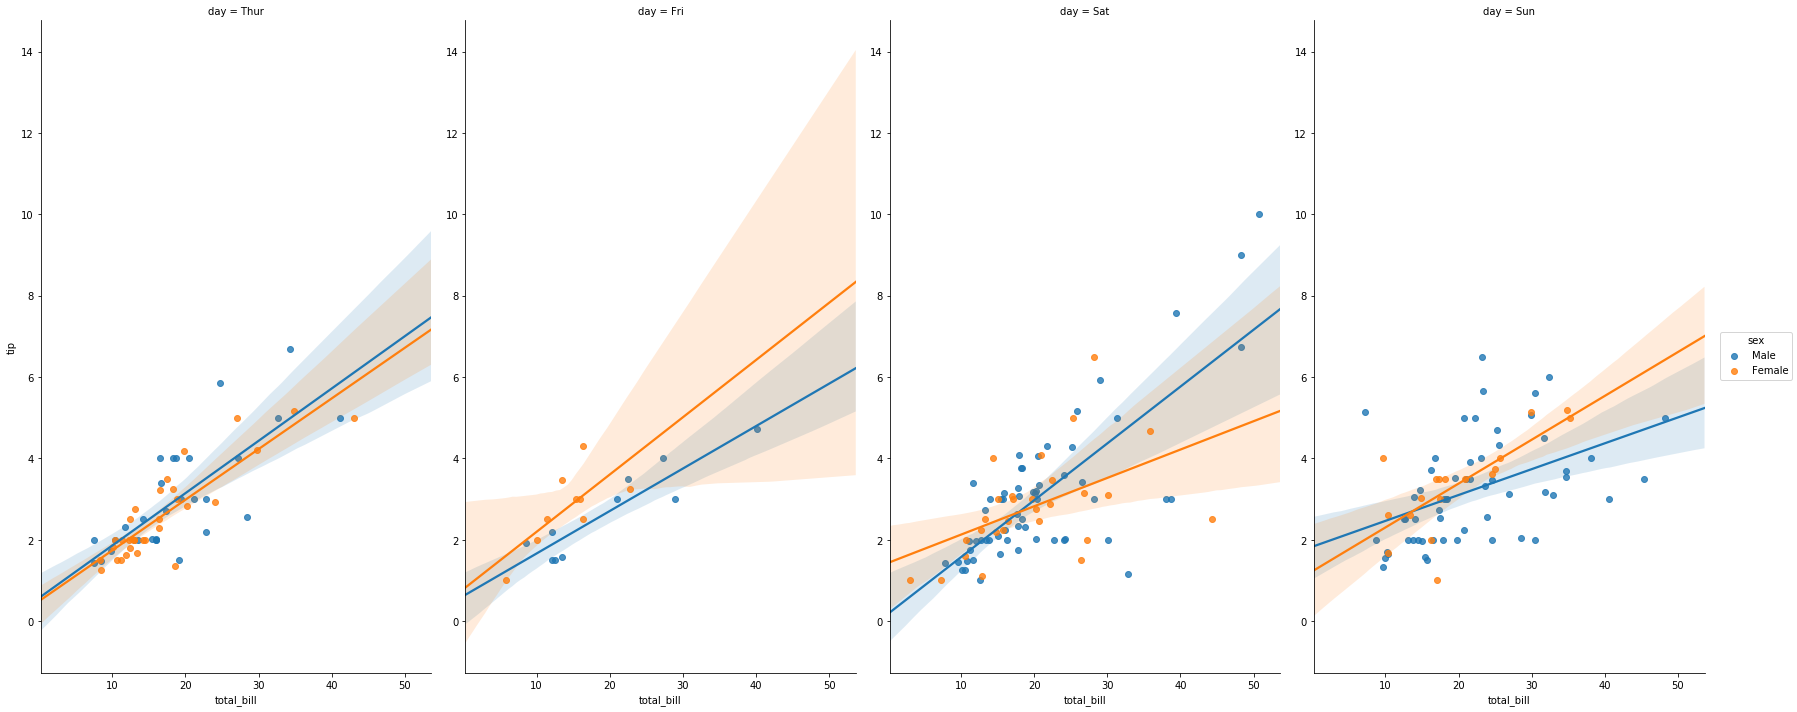

In [149]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
           aspect=0.6,size=10)

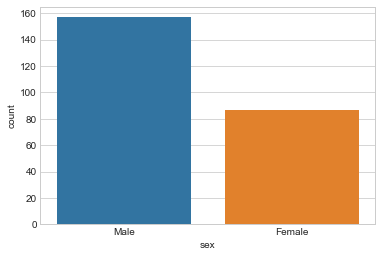

In [153]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

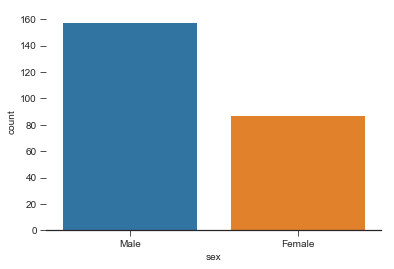

In [160]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(top=True, right=True, left=True, bottom=False, offset=None, 
            trim=False)

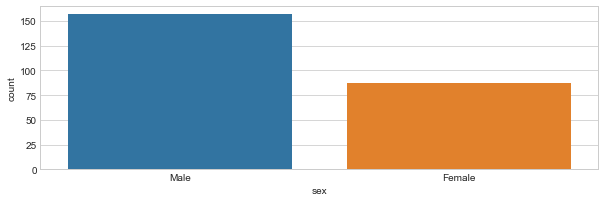

In [164]:
plt.figure(figsize=(10,3))
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

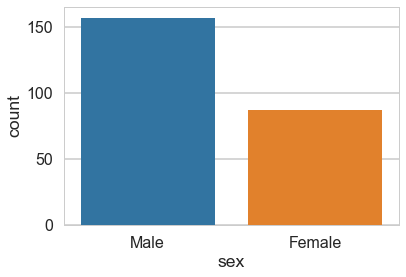

In [174]:
sns.set_context('poster',font_scale=1)
sns.countplot(x='sex',data=tips)

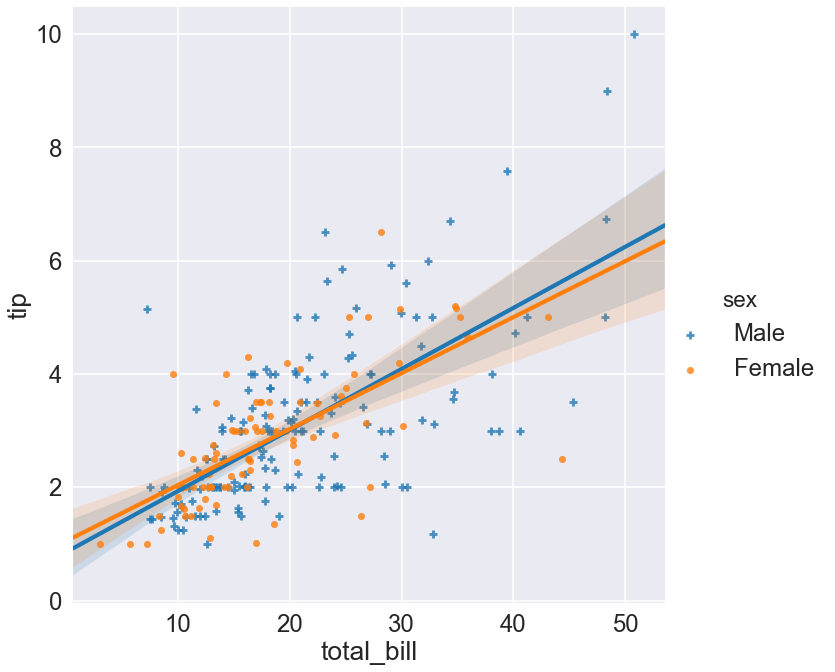

In [187]:
sns.set_context('poster',font_scale=1.5)
sns.set_style('darkgrid')
fig =sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex',markers=['+','o'],
          scatter_kws={'s':50},size=10)
fig

In [188]:
fig.savefig('abc.jpeg',dpi=400)